In [62]:
import numpy as np
from scipy.optimize import minimize
from fitness import fitness_multi_objective, fitness_max_energy_production
from utils import generate_random_incorrect_layout, is_layout_valid
from plotting import *

In [2]:
# set figsize and dpi for all figures
saved_figure_figsize, saved_figure_dpi = plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"]
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 90

In [3]:
# PROBLEM CONSTANTS
n_turbines = 14
area_size = 300
min_spacing = 50
wind_speed = 9.8
wind_direction = 270.0
fitness_weights = {
        'energy_production': 0.5,
        'boundary_fitness': 0.2,
        'spacing_fitness': 0.2,
        'wake_fitness': 0.1,
        'is_valid': 1,
    }

In [69]:
objective_values = []

def objective_function(flattened_layout):
    layout = flattened_layout.reshape((n_turbines, 2)).astype(int)
    fitness_value = fitness_multi_objective(layout, fitness_weights, area_size, min_spacing, wind_speed, wind_direction)
    objective_values.append(fitness_value)
    return -fitness_value

Optimization terminated successfully.
         Current function value: -22.150000
         Iterations: 4
         Function evaluations: 650
Optimization terminated successfully.
         Current function value: -21.250000
         Iterations: 2
         Function evaluations: 212
Optimization terminated successfully.
         Current function value: -19.350000
         Iterations: 2
         Function evaluations: 300
Optimization terminated successfully.
         Current function value: -21.250000
         Iterations: 3
         Function evaluations: 507
Optimization terminated successfully.
         Current function value: -18.350000
         Iterations: 2
         Function evaluations: 308


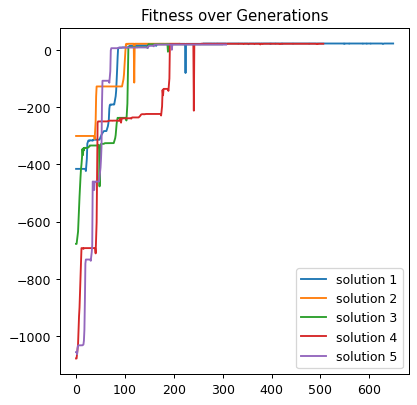

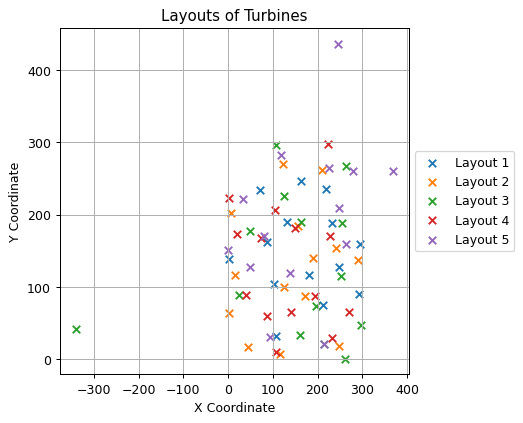

solution 1 valid: True , score: 22.150000000000006
solution 2 valid: True , score: 21.250000000000007
solution 3 valid: False , score: 19.35000000000001
solution 4 valid: True , score: 21.250000000000007
solution 5 valid: False , score: 18.35000000000001


In [90]:
bounds = [(0, area_size) for _ in range(n_turbines * 2)]

best_layouts = []
best_fitness_values = []
fitness_values = []
num_simulations = 5
for i in range(num_simulations):
    initial_layout = generate_random_incorrect_layout(n_turbines, area_size, min_spacing)
    initial_flattened_layout = np.array(initial_layout).flatten()
    
    objective_values = []
    result = minimize(objective_function,
                      initial_flattened_layout,
                      method='Powell',
                      #bounds=bounds,
                      options={'disp': True})

    optimal_layout = result.x.reshape((n_turbines, 2)).astype(int)
    optimal_fitness = -result.fun 
    best_layouts.append(optimal_layout)
    best_fitness_values.append(optimal_fitness)
    fitness_values.append(objective_values)
    

plot_solutions_data_stats(fitness_values, "Fitness over Generations")
plot_multiple_layouts(best_layouts)

valid_solutions = []
for i, (layout, score) in enumerate(zip(best_layouts, best_fitness_values)):
    valid = is_layout_valid(layout, area_size, min_spacing)
    print(f"solution {i+1} valid:", valid, ", score:", score)
    if valid:
        valid_solutions.append([layout, score])

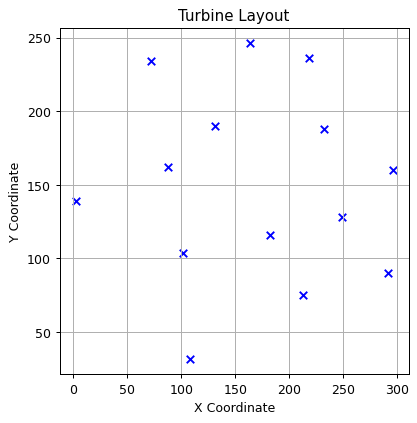

Best solution fitness:  22.150000000000006
Is best solution valid:  True
Fitness max energy production:  23.450000000000006
solution/max_energy_production: 94.45628997867803 %


In [91]:
if valid_solutions:
    single_best_layout, single_best_fitness = max(valid_solutions, key=lambda x: x[1])
    plot_turbine_layout(single_best_layout)
    
    max_energy_production = fitness_max_energy_production(single_best_layout, fitness_weights, wind_speed)
    print("Best solution fitness: ", single_best_fitness)
    print("Fitness max energy production: ", max_energy_production)
    print(f"solution/max_energy_production: {single_best_fitness/max_energy_production * 100} %")
else:
    print("No valid solutions")